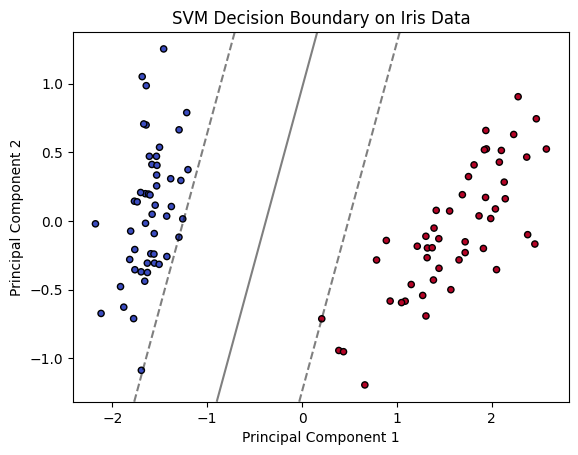

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# 1. Load dữ liệu Iris
iris = load_iris()
X, y = iris.data, iris.target

# Chỉ lấy hai lớp Iris-setosa (0) và Iris-versicolor (1)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# 2. Giảm số chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3. Huấn luyện mô hình SVM
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_reduced, y)

# 4. Vẽ biểu đồ
# Vẽ các điểm dữ liệu
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on Iris Data")
plt.show()


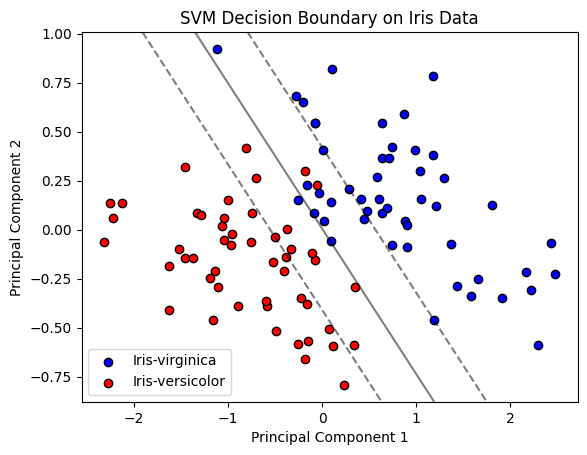

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.svm import SVC

# 1. Load dữ liệu Iris
iris = load_iris()
X, y = iris.data, iris.target

# Chỉ lấy hai lớp Iris-setosa (0) và Iris-versicolor (1)
mask = (y == 2) | (y == 1)
X = X[mask]
y = y[mask]

# 2. Giảm số chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3. Huấn luyện mô hình SVM
svm_clf = SVC(kernel="linear")
svm_clf.fit(X_reduced, y)

# 4. Vẽ biểu đồ
# Vẽ các điểm dữ liệu, màu xanh là class Iris-setosa và màu đỏ là class Iris-versicolor
plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1], color='blue', label='Iris-virginica', edgecolors='k')
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], color='red', label='Iris-versicolor', edgecolors='k')

# Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = svm_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ đường phân cách và các biên quyết định
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on Iris Data")
plt.legend()
plt.show()


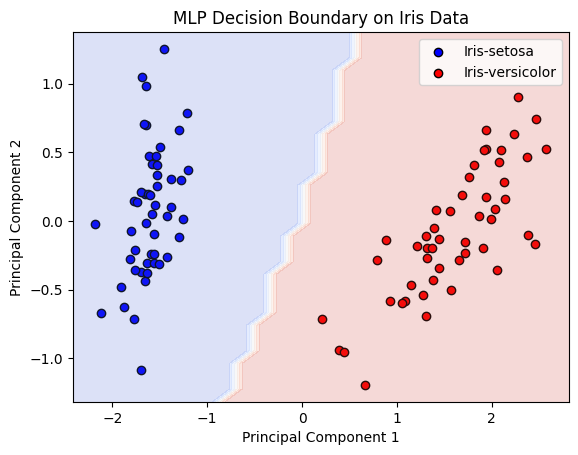

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# 1. Load dữ liệu Iris
iris = load_iris()
X, y = iris.data, iris.target

# Chỉ lấy hai lớp Iris-setosa (0) và Iris-versicolor (1)
mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

# 2. Giảm số chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3. Huấn luyện mô hình MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_clf.fit(X_reduced, y)

# 4. Vẽ biểu đồ
# 4.1. Vẽ các điểm dữ liệu
plt.scatter(X_reduced[y==0, 0], X_reduced[y==0, 1], color='blue', label='Iris-setosa', edgecolors='k')
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], color='red', label='Iris-versicolor', edgecolors='k')

# 4.2. Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 4.3. Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = mlp_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4.4. Vẽ đường phân cách
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)

plt.xlabel("Principal Component 1")  # Tên trục x
plt.ylabel("Principal Component 2")  # Tên trục y
plt.title("MLP Decision Boundary on Iris Data")  # Tiêu đề biểu đồ
plt.legend()

plt.show()  # Hiển thị biểu đồ


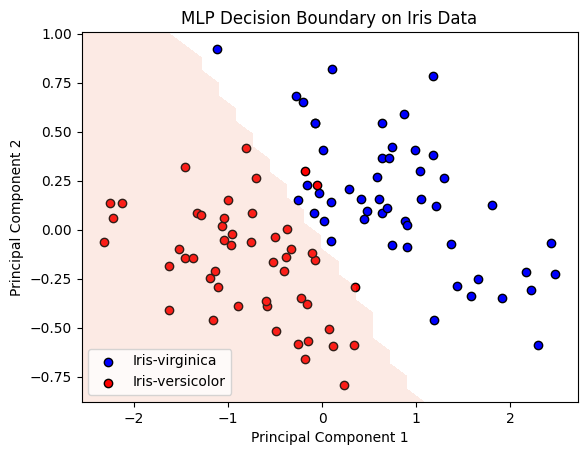

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier

# 1. Load dữ liệu Iris
iris = load_iris()
X, y = iris.data, iris.target

# Chỉ lấy hai lớp Iris-setosa (0) và Iris-versicolor (1)
mask = (y == 2) | (y == 1)
X = X[mask]
y = y[mask]

# 2. Giảm số chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# 3. Huấn luyện mô hình MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
mlp_clf.fit(X_reduced, y)

# 4. Vẽ biểu đồ
# 4.1. Vẽ các điểm dữ liệu
plt.scatter(X_reduced[y==2, 0], X_reduced[y==2, 1], color='blue', label='Iris-virginica', edgecolors='k')
plt.scatter(X_reduced[y==1, 0], X_reduced[y==1, 1], color='red', label='Iris-versicolor', edgecolors='k')

# 4.2. Vẽ đường phân cách
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# 4.3. Tạo lưới để vẽ đường phân cách
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 30), np.linspace(ylim[0], ylim[1], 30))
Z = mlp_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4.4. Vẽ đường phân cách
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2,levels=[-1, 0, 1])

plt.xlabel("Principal Component 1")  # Tên trục x
plt.ylabel("Principal Component 2")  # Tên trục y
plt.title("MLP Decision Boundary on Iris Data")  # Tiêu đề biểu đồ
plt.legend()

plt.show()  # Hiển thị biểu đồ
